<a href="https://colab.research.google.com/github/Areyouneema/Areyouneema/blob/main/UnemploymentTrendsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit pyngrok scikit-learn pandas matplotlib seaborn


In [2]:
pip install statsmodels pandas matplotlib


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-3-1991744516.py:28: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = 

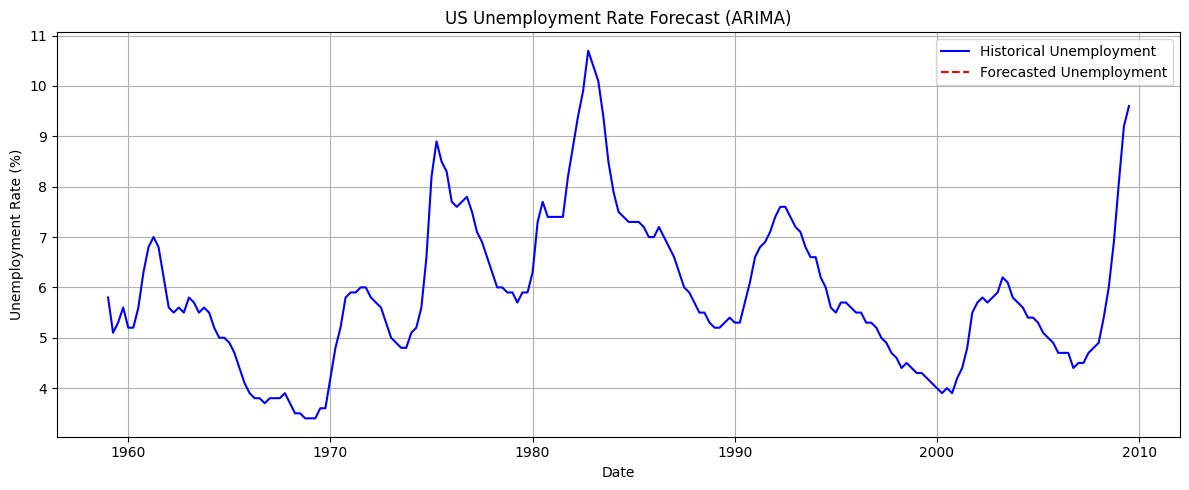

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load macroeconomic dataset
data = sm.datasets.macrodata.load_pandas().data

# Step 2: Convert 'year' + 'quarter' to datetime
def convert_to_date(row):
    return f"{int(row['year'])}-{'%02d' % (int((row['quarter'] - 1) * 3 + 1))}"

data['date'] = pd.to_datetime(data.apply(convert_to_date, axis=1))
data.set_index('date', inplace=True)

# Step 3: Select unemployment data
unemp_series = data['unemp']

# Step 4: Fit ARIMA model (p=2, d=1, q=2)
model = ARIMA(unemp_series, order=(2, 1, 2))
model_fit = model.fit()

# Step 5: Forecast future quarters
n_forecast = 12
forecast = model_fit.forecast(steps=n_forecast)

# Step 6: Create forecast index
forecast_index = pd.date_range(start=unemp_series.index[-1], periods=n_forecast + 1, freq='Q')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Step 7: Plot results
plt.figure(figsize=(12, 5))
plt.plot(unemp_series.index, unemp_series, label='Historical Unemployment', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Unemployment', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("US Unemployment Rate Forecast (ARIMA)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
!ngrok config add-authtoken 2zOvxeNi5czBNiBeo0rrYt3lPnU_2neaq1ANajo3iB2t6yjrT

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [5]:
app_code = """
import streamlit as st
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Load macroeconomic dataset
data = sm.datasets.macrodata.load_pandas().data

# Convert year & quarter to datetime
def convert_to_date(row):
    return f"{int(row['year'])}-{'%02d' % (int((row['quarter'] - 1) * 3 + 1))}"

data['date'] = pd.to_datetime(data.apply(convert_to_date, axis=1))
data.set_index('date', inplace=True)

st.title("📉 Unemployment Trends Analysis (Macro Data)")

st.write(\"""
This app visualizes US unemployment trends using the `statsmodels` macroeconomic dataset.
You can explore time series plots and forecast future unemployment using ARIMA.
\""")

# Show raw data
if st.checkbox("Show Raw Data"):
    st.dataframe(data[['unemp']])

# Plot unemployment over time
st.subheader("Unemployment Rate Over Time")
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data.index, data['unemp'], label='Unemployment Rate', color='orange')
ax.set_ylabel('Unemployment (%)')
ax.set_xlabel('Date')
ax.legend()
st.pyplot(fig)

# Forecasting
st.subheader("Forecast Unemployment")

n_forecast = st.slider("Select Forecast Horizon (quarters)", min_value=4, max_value=24, value=8)

# Train ARIMA model
model = ARIMA(data['unemp'], order=(2,1,2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=n_forecast)

# Create forecast index
forecast_index = pd.date_range(start=data.index[-1], periods=n_forecast+1, freq='Q')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot forecast
fig2, ax2 = plt.subplots(figsize=(10, 4))
ax2.plot(data.index, data['unemp'], label='Historical', color='blue')
ax2.plot(forecast_series.index, forecast_series, label='Forecast', color='red', linestyle='--')
ax2.set_ylabel('Unemployment (%)')
ax2.set_xlabel('Date')
ax2.legend()
st.pyplot(fig2)

# Footer
st.markdown("---")
st.markdown("📊 Source: `statsmodels.datasets.macrodata`")
"""
with open("app.py", "w") as f:
    f.write(app_code)


In [6]:
from pyngrok import ngrok

# Start Streamlit app
!streamlit run app.py &>/content/log.txt &

# Open ngrok tunnel (fixed)
public_url = ngrok.connect(addr="8501", proto="http")
print("🌐 Streamlit app is live at:", public_url)


🌐 Streamlit app is live at: NgrokTunnel: "https://a3d5-34-106-189-147.ngrok-free.app" -> "http://localhost:8501"
